In [146]:
#!/Tsan/bin/python
# -*- coding: utf-8 -*-

In [147]:
# Libraries to use
from __future__ import division 
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
# Import My own library for factor testing
import factorFilterFunctions as ff
#from config import *

In [149]:
%matplotlib inline

In [150]:
# Files to use 
filenamePrice='my_own_factor_AdjustedPriceForward.csv'
filenameST='LZ_GPA_SLCIND_ST_FLAG.csv'
filenameTradeday='LZ_GPA_SLCIND_TRADEDAYCOUNT.csv'
filenameStopFlag='LZ_GPA_SLCIND_STOP_FLAG.csv'
filenameIndu='LZ_GPA_INDU_ZX.csv'
filenameFCAP='LZ_GPA_VAL_A_FCAP.csv'
filenameAdjustFactor='LZ_GPA_CMFTR_CUM_FACTOR.csv'
filenameHS300 = 'LZ_GPA_INDXQUOTE_CLOSE.csv'


In [151]:
# Factors
# Value factor
filenamePE='LZ_GPA_VAL_PE.csv'  # 市盈率
filenamePB='LZ_GPA_VAL_PB.csv'  # 市净率
filenamePS = 'LZ_GPA_VAL_PS.csv' # 市销率
filenamePCF = 'LZ_GPA_VAL_PC.csv' # 市现率

# Growth factor
filenameYOYGR = 'LZ_GPA_FIN_IND_QFA_YOYGR.csv'  # 单季度.营业总收入同比增长率(%)
filenameYOYNETPROFIT = 'LZ_GPA_FIN_IND_QFA_YOYNETPROFIT.csv' # 单季度.归属母公司股东的净利润同比增长率(%)
filenameYOYOCF = 'LZ_GPA_FIN_IND_YOYOCF.csv' # 同比增长率-经营活动产生的现金流量净额(%)
filenameYOYROE = 'LZ_GPA_FIN_IND_YOYROE.csv' # 同比增长率-净资产收益率(摊薄)(%)
filenameYOYBPS = 'LZ_GPA_FIN_IND_YOYBPS.csv' # 相对年初增长率-每股净资产(%)

# Momentum factor
filenameTRUEMOM = 'LZ_GPA_USR_MOM.csv' # 真动量
filenameMOM1M = 'LZ_GPA_DERI_Momentum_1M.csv' # 一月反转
filenameMOM3M = 'LZ_GPA_TURNOVER_TurnoverAvg_3M.csv' # 三月反转
filenamePVO = 'LZ_GPA_DERI_PVO.csv' # 一年偏度
filenameRV1Y = 'LZ_GPA_DERI_RealizedVolatility_1Y.csv' # 一年收益波动
filenameABNORMALVOLUME = 'LZ_GPA_DERI_NormalizedAbormalVolume.csv' # 归一化异常交易量
filenameSKEW = 'LZ_GPA_DERI_TSKEW.csv'# 偏度

# Liquidity factor
filenameTURNOVER1M = 'LZ_GPA_TURNOVER_TurnoverAvg_1M.csv' # 一月换手率均值
filenameAMOUNTAVG1M = 'LZ_GPA_DERI_AmountAvg_1M.csv'      # 三月换手率均值
filenameILLIQ = 'LZ_GPA_DERI_ILLIQ.csv'                   # 非流动性因子



In [152]:
# Constants
path = ff.data_path
timeStampNum = 2500
thresholdNum = 0.2
HSIndex='000300.SH'

In [153]:
# Several dictionaries for different sorts of factors 
filenameDictValue = {'PE':filenamePE,'PB':filenamePB, 'PS':filenamePS, 'PCF':filenamePCF}
filenameDictGrowth = {'YOYGR':filenameYOYGR,'YOYGRPROFIT':filenameYOYNETPROFIT,'YOYOCF':filenameYOYOCF, 'YOYROE':filenameYOYROE, 'YOYBPS':filenameYOYBPS}
filenameDictMomentum = {'TRUE_MOM':filenameTRUEMOM, 'MOM_1M':filenameMOM1M , 'MOM3M':filenameMOM3M,'PVO':filenamePVO, 'RV1Y':filenameRV1Y,\
                       'ABORMALVOLUME':filenameABNORMALVOLUME,'SKEW':filenameSKEW}
filenameDictLiq = {'TURNOVER_1M':filenameTURNOVER1M, 'AMOUNTAVG1M':filenameAMOUNTAVG1M, 'ILLIQ':filenameILLIQ}

In [154]:
filenameDict = filenameDictMomentum

In [155]:
# total filename dictionary
#filenameDict = {'PE':filenamePE,'PB':filenamePB, 'PS':filenamePS, 'PCF':filenamePCF, 'YOYGR':filenameYOYGR,'YOYGRPROFIT':filenameYOYNETPROFIT, \
#                'TRUE_MOM':filenameTRUEMOM, 'MOM_1M':filenameMOM1M , 'MOM3M':filenameMOM3M, 'TURNOVER_1M':filenameTURNOVER1M }

In [156]:
stDF = pd.read_csv(path+filenameST,infer_datetime_format=True,parse_dates=[0],index_col=0)[-timeStampNum-1:-5]
tradeDayDF = pd.read_csv(path+filenameTradeday,infer_datetime_format=True,parse_dates=[0],index_col=0)[-timeStampNum-1:-5]
stopFlagDF = pd.read_csv(path+filenameStopFlag,infer_datetime_format=True,parse_dates=[0],index_col=0)[-timeStampNum-1:-5]

In [157]:
priceData =  pd.read_csv(path+ filenamePrice ,infer_datetime_format=True,parse_dates=[0],index_col=0)[-timeStampNum-1:-5]
benchMarkData = pd.read_csv(path+filenameHS300,infer_datetime_format=True,parse_dates=[0],index_col=0)[-timeStampNum-1:-5][HSIndex]

In [158]:
LFCAPDF = np.log(ff.getData(filenameFCAP, timeStampNum, thresholdNum))

In [159]:
endOfMonthList = ff.getLastDayOfMonth(LFCAPDF.index)[1]

In [160]:
activeReturnData =ff.calcReturn(priceData, endOfMonthList, benchmark = benchMarkData,activeReturn = True,logReturn = False)

In [161]:
IndustryDF = pd.read_csv(path+filenameIndu,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[endOfMonthList]

In [162]:
# Generate the useles stock list
filterdict={}
for i in endOfMonthList:
    suspendList = ff.GetSTNewSuspend(i,stDF,tradeDayDF,stopFlagDF)
    filterdict[i] = suspendList
    print i, len(filterdict[i])

2006-11-30 00:00:00 268
2006-12-29 00:00:00 307
2007-01-31 00:00:00 277
2007-02-28 00:00:00 288
2007-03-30 00:00:00 269
2007-04-30 00:00:00 339
2007-05-31 00:00:00 303
2007-06-29 00:00:00 324
2007-07-31 00:00:00 281
2007-08-31 00:00:00 299
2007-09-28 00:00:00 317
2007-10-31 00:00:00 308
2007-11-30 00:00:00 301
2007-12-28 00:00:00 324
2008-01-31 00:00:00 316
2008-02-29 00:00:00 315
2008-03-31 00:00:00 299
2008-04-30 00:00:00 296
2008-05-30 00:00:00 308
2008-06-30 00:00:00 319
2008-07-31 00:00:00 270
2008-08-29 00:00:00 241
2008-09-26 00:00:00 259
2008-10-31 00:00:00 230
2008-11-28 00:00:00 253
2008-12-31 00:00:00 230
2009-01-23 00:00:00 211
2009-02-27 00:00:00 218
2009-03-31 00:00:00 227
2009-04-30 00:00:00 249
2009-05-27 00:00:00 237
2009-06-30 00:00:00 257
2009-07-31 00:00:00 240
2009-08-31 00:00:00 257
2009-09-30 00:00:00 250
2009-10-30 00:00:00 281
2009-11-30 00:00:00 288
2009-12-31 00:00:00 317
2010-01-29 00:00:00 296
2010-02-26 00:00:00 331
2010-03-31 00:00:00 340
2010-04-30 00:00

In [163]:
normalizedLFCAP = ff.winsorAndnorm(LFCAPDF, filterdict, endOfMonthList)

In [164]:
# Creat new dataframe to save the outcome
global returnofFactor
global tValueofFactor
global pValueofFactor
global ICFactor
returnofFactor = pd.DataFrame(index=endOfMonthList[:-1],columns=[filenameDict.keys()],data=None) 
tValueofFactor = pd.DataFrame(index= endOfMonthList[:-1],columns= [filenameDict.keys()],data=None)
pValueofFactor = pd.DataFrame(index= endOfMonthList[:-1],columns= [filenameDict.keys()],data=None)
ICFactor =  pd.DataFrame(index= endOfMonthList[:-1],columns= [filenameDict.keys()],data=None)

In [165]:
#  ---------All above are global variables --------

In [166]:
for i,j in filenameDict.iteritems():
    factorData = ff.getData(j, timeStampNum, thresholdNum)
    normalizedData = ff.winsorAndnorm(factorData, filterdict, endOfMonthList)
    neutralizedData = ff.neutralizeFactor(normalizedData, normalizedLFCAP,IndustryDF,endOfMonthList)
    ff.calReturnAndIC(returnofFactor,tValueofFactor,pValueofFactor,ICFactor,neutralizedData,activeReturnData,i)

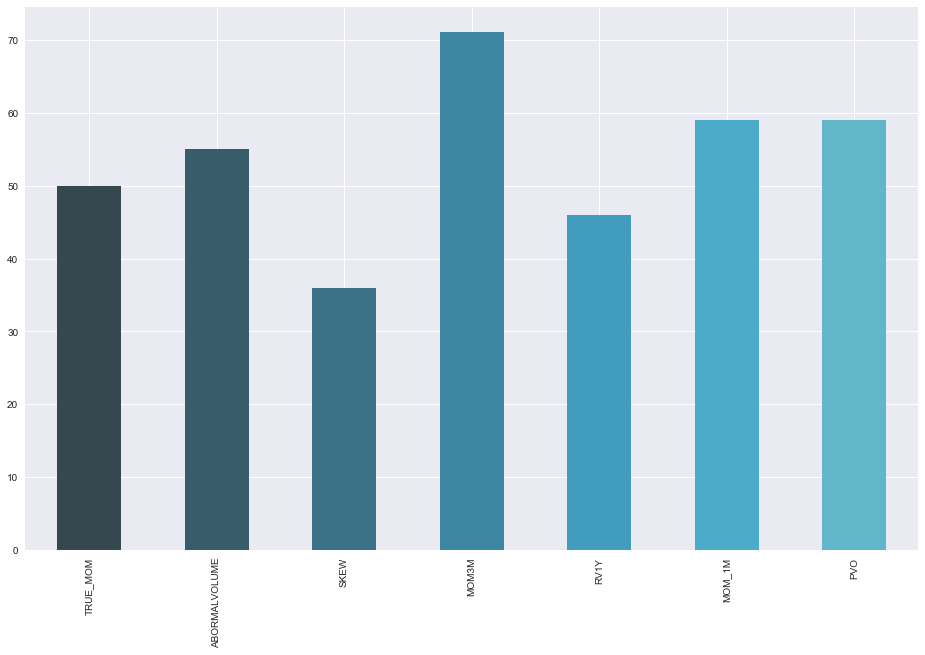

In [167]:
ICFactor[np.abs(ICFactor)>np.abs(ICFactor).mean().mean()].count().plot(figsize=(16,10),kind='bar',color=sns.color_palette("GnBu_d",10))

In [168]:
ICFactor.astype(float).describe()

,TRUE_MOM,ABORMALVOLUME,SKEW,MOM3M,RV1Y,MOM_1M,PVO
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,-0.027035,-0.059125,-0.041135,-0.082605,-0.016423,-0.078547,-0.075392
std,0.111871,0.087787,0.062175,0.096468,0.084979,0.099995,0.073382
min,-0.322311,-0.362518,-0.211941,-0.445268,-0.180237,-0.343158,-0.220762
25%,-0.095533,-0.113813,-0.086420,-0.150061,-0.081544,-0.134174,-0.130650
50%,-0.015983,-0.062328,-0.039011,-0.089391,-0.016269,-0.070686,-0.078068
75%,0.035263,-0.007083,-0.001720,-0.023757,0.049262,-0.017620,-0.033195
max,0.290981,0.216476,0.110037,0.142628,0.184439,0.136116,0.122914


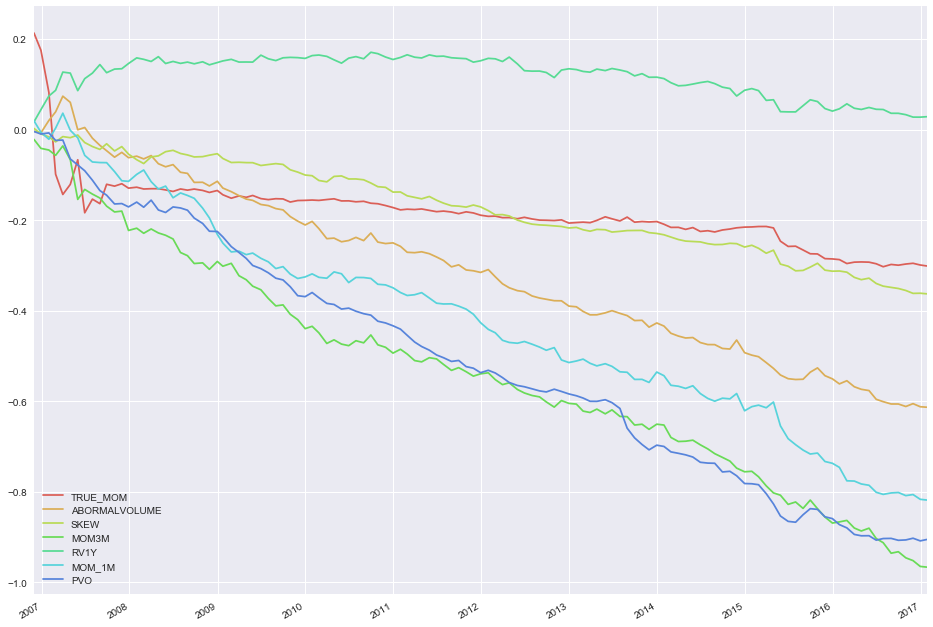

In [169]:
returnofFactor.cumsum().plot(figsize=(16,12),color=sns.color_palette("hls",10))

In [170]:
returnofFactor.astype(float).describe()

,TRUE_MOM,ABORMALVOLUME,SKEW,MOM3M,RV1Y,MOM_1M,PVO
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,-0.002447,-0.004983,-0.002948,-0.007855,0.000232,-0.006650,-0.007359
std,0.030364,0.011057,0.006527,0.013509,0.010376,0.013204,0.009506
min,-0.180717,-0.060536,-0.030780,-0.087908,-0.038748,-0.052729,-0.043507
25%,-0.004307,-0.011095,-0.006495,-0.014445,-0.004735,-0.014671,-0.012781
50%,-0.000977,-0.005500,-0.002777,-0.008964,-0.000574,-0.006116,-0.006464
75%,0.001541,0.000023,0.000483,0.001267,0.004584,0.001336,-0.002183
max,0.213437,0.034669,0.014626,0.022031,0.040257,0.033046,0.016527


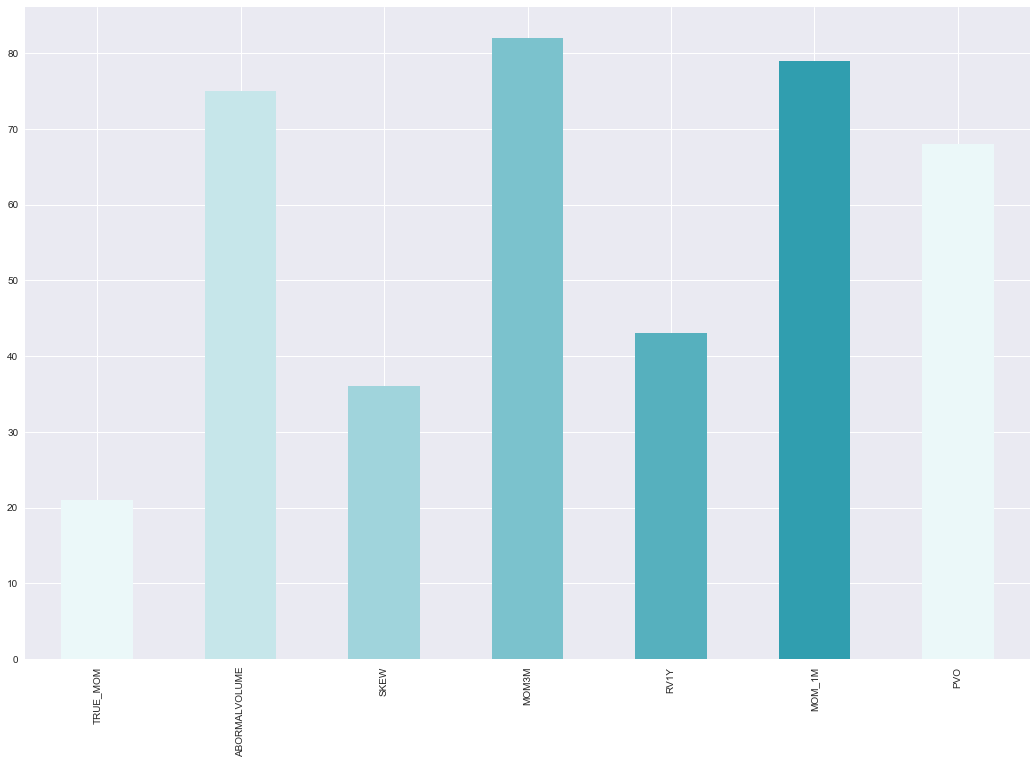

In [171]:
color_set=sns.light_palette((210, 90, 60), input="husl")
pValueofFactor[pValueofFactor<0.05].count().plot(figsize=(18,12),kind='bar',color=sns.color_palette(color_set,10))

In [172]:
ReturnForPlot = returnofFactor.copy()
ReturnForPlot.index = ReturnForPlot.index.map(lambda x:100*x.year+(x.month+1))

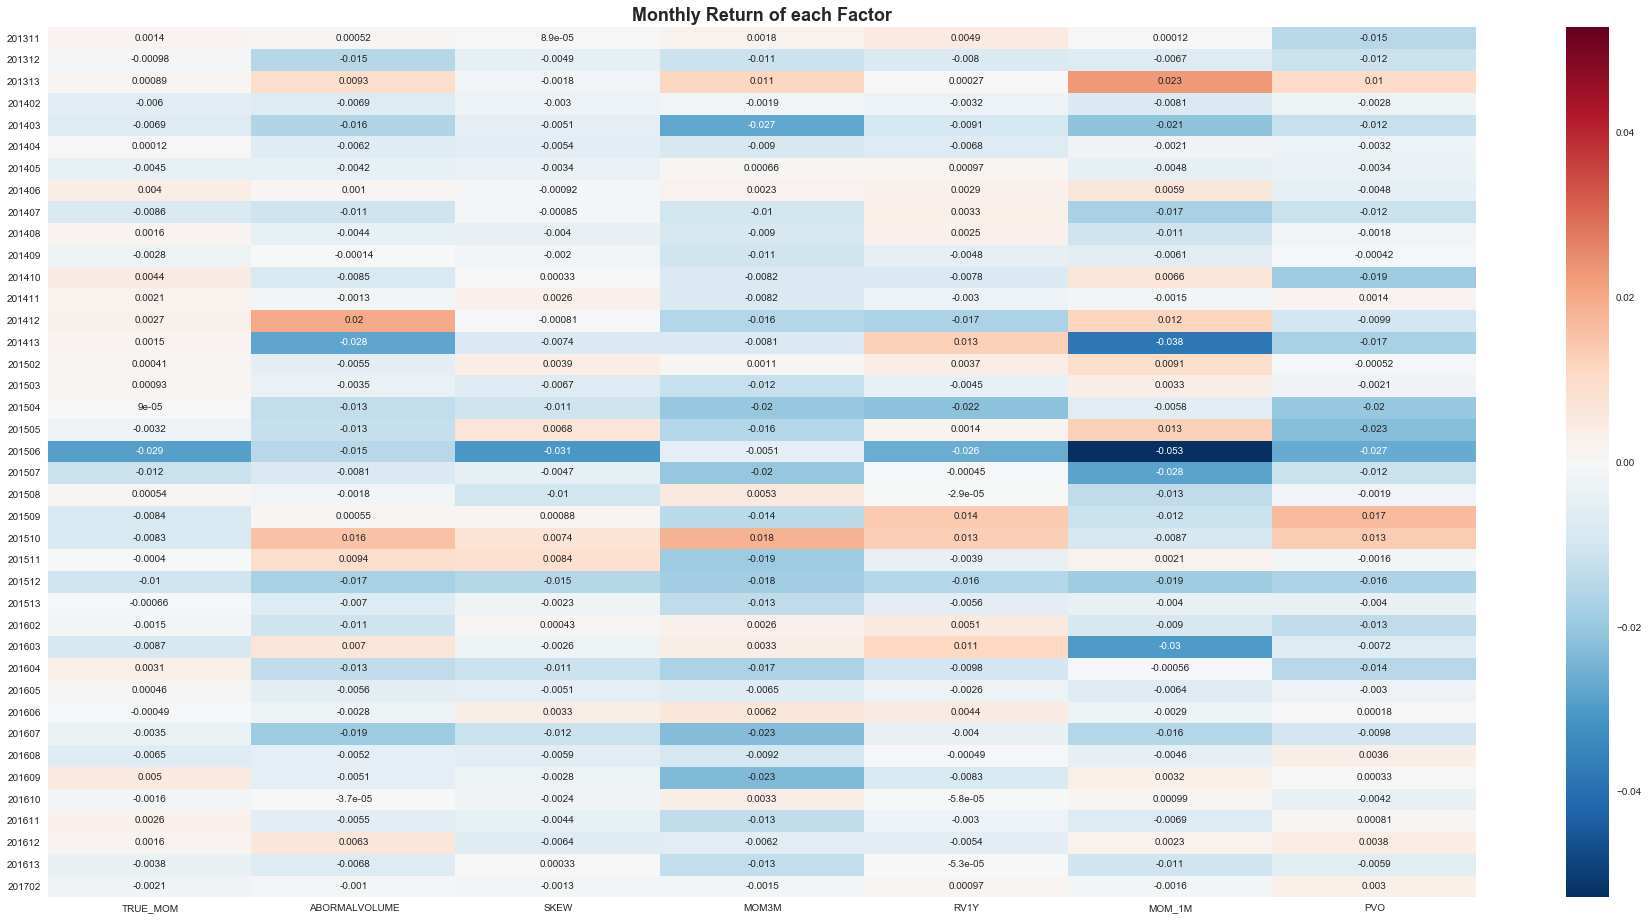

In [173]:
ReturnForPlot = ReturnForPlot.astype(float)

plt.figure(figsize=(32,16))
ax = plt.axes()
sns.heatmap(ReturnForPlot[-40:],ax=ax, annot=True)
ax.set_title('Monthly Return of each Factor',fontsize=18, fontweight='bold')
plt.show()